# Student Performance

## Introduction

This databook develops model to predict student performance on math course in secondary education.

Dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance



**Attribute Information:**

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

**#these grades are related with the course subject, Math or Portuguese:**

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

## Library Imports

In [1]:
import numpy as np
import pandas as pd

#expand max number of display columns
pd.set_option('display.max_column', 100)

from matplotlib import pyplot as plt

#display plots in the notebook
%matplotlib inline

#seaborn for more options of visualisation
import seaborn as sns

from sklearn.model_selection import train_test_split

## Exploratory Analysis

In [2]:
#import mathematic data set
df = pd.read_csv('Data\student-mat.csv', sep =';')

In [3]:
#check data dimensions
df.shape

(395, 33)

In [4]:
#check data types
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
#display first few rows of data
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [6]:
#display last few rows of data
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


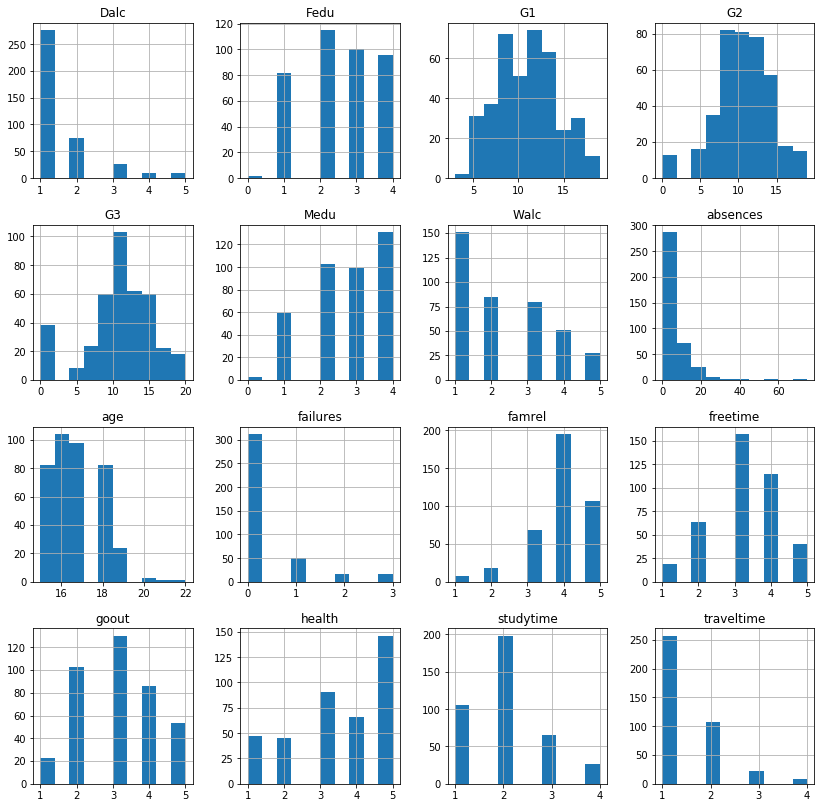

In [7]:
#plot histogram on numerial data

df.hist(figsize = [14,14])

plt.show() #remove 'residue' text

In [8]:
#numerical data summary
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
#categorical data summary
df.describe(include = 'object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


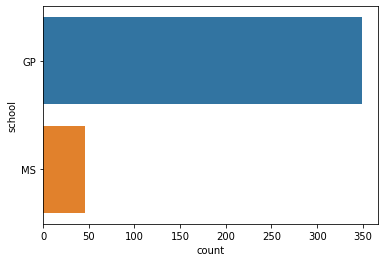

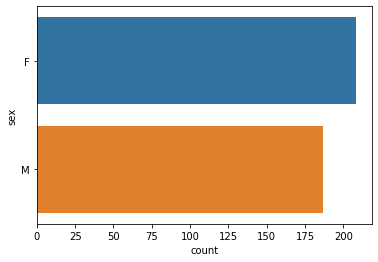

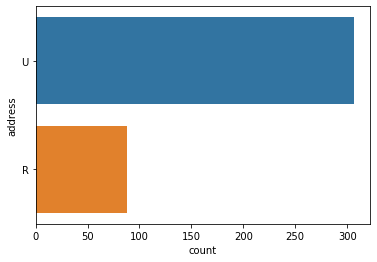

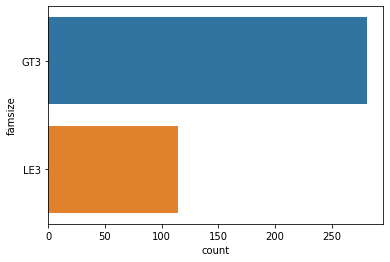

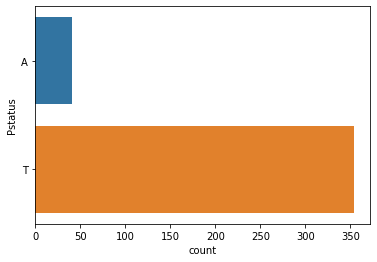

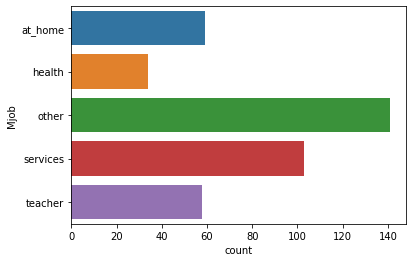

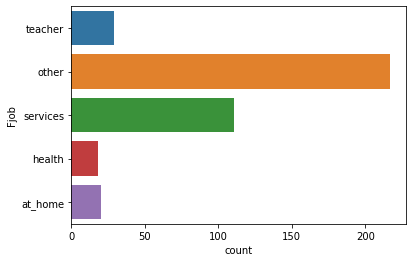

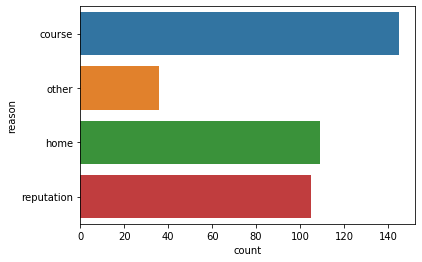

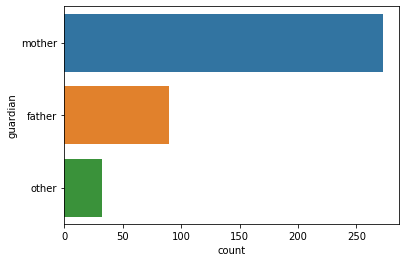

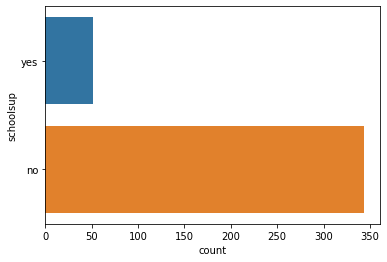

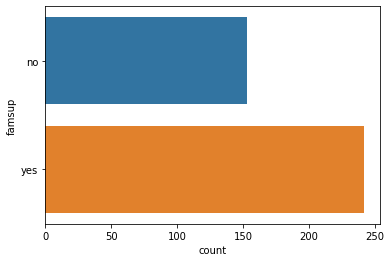

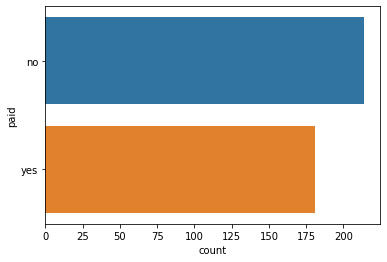

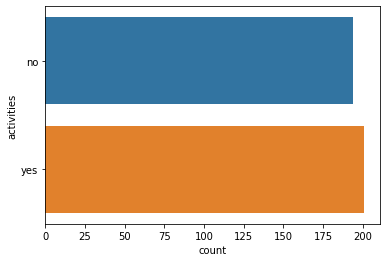

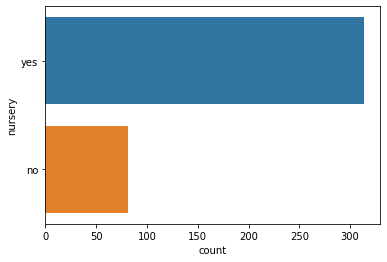

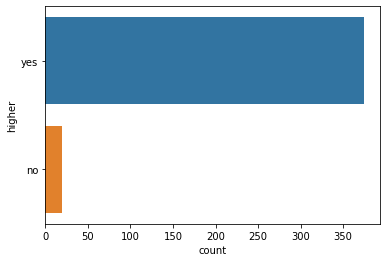

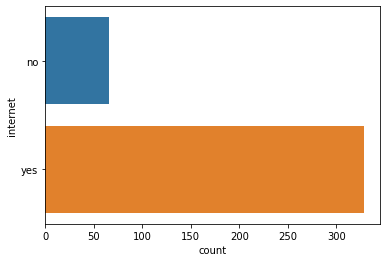

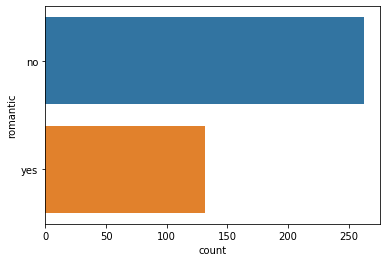

In [10]:
# visualise categorical data using bar plot
for feature in df.dtypes[df.dtypes =='object'].index:
    sns.countplot(y = feature, data = df)
    plt.show()

In [11]:
# check for missing data
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [12]:
#correlations between numerical features
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


it was too difficult to visualise the correlations, we will show the correlations using seaborn's heatmap.

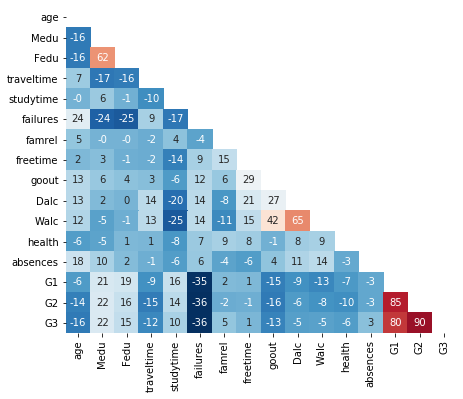

In [13]:
# visualise correlations between numerical features
correlations = df.corr()

plt.figure(figsize = (7,6))

#generate a mask for the upper triangle
#this is for clearer view of the correlations
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

#to make chart cleaner, multiply corr df with 100 before passing to the heatmap function
#pass the format  to a whole number

sns.heatmap(correlations * 100, cmap='RdBu_r', annot=True, fmt='.0f', mask=mask, cbar = False)
plt.show()

from the heatmap above, we can see no strong correlations among the numerial features, except the results G1, G2, G3.

## Data Cleaning
Remember better data is always better than fancier algorithm

In [14]:
# remove duplicates data, if any...
df = df.drop_duplicates()
print(df.shape)

(395, 33)


not much data cleaning required, as data has been collected in complete form. No outlier and or missing data.

## Feature Engineering

In [15]:
#data in ordinal form, replace GT3 with 1 and LE3 with 0
df.famsize.replace(['GT3','LE3'],[1,0], inplace = True)

In [16]:
#create dummy variables for categorical features to allow us run ML algorithm on our dataset
df = pd.get_dummies(df)

## Algorithm Selection

In [17]:
#import Regularized Regression algorithms
from sklearn.linear_model import Lasso, Ridge, ElasticNet

#import Tree Ensemble algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## Model Training

In [18]:
#split data into training and testing sets

y = df.G3

#only drop target variable G3, keep G1 & G2 results as input variables
X_g1_g2 = df.drop ('G3', axis = 1)

#only drop target variable G2, G3, keep only G1 result as part of input variables
X_g1 = df.drop(['G2','G3'], axis = 1)

#only drop target variable G1, G3, keep only G2 result as part of input variables
X_g2 = df.drop(['G1','G3'], axis = 1)

#drop all results (G1, G2 & G3)
X = df.drop(['G1','G2','G3'], axis =1)

### Training without using first period (G1) and second period (G2) results

In [19]:
#perform train and test data splits using y and X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# confirm we have the right number of train and test data set
print( len(X_train), len(X_test), len(y_train), len(y_test) )

316 79 316 79


In [20]:
#instantiate all the 5 models.
#for now we use all the default hyperparameters specified in the models.
rg_lasso = Lasso(random_state=1234)
rg_ridge = Ridge(random_state=1234)
rg_en = ElasticNet(random_state=1234) 
rg_rf = RandomForestRegressor(random_state=1234)
rg_gb = GradientBoostingRegressor(random_state=1234)

In [21]:
#create a dictionary to house all the instantiated models.
model_list = {'lasso': rg_lasso,
              'ridge': rg_ridge, 
              'en': rg_en, 
              'rf': rg_rf, 
              'gb': rg_gb}

In [22]:
# a for loop to train the models all in once
fitted_models = {}
for name, model in model_list.items():
    model.fit(X_train, y_train)
    
    fitted_models[name] = model

In [23]:
# a for loop to predict the results using all the different models

prediction = {}
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    
    prediction[name] = pred

In [24]:
# import default scoring metric of R2 and mean absolute error to find lowerest mean absolute error. 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [25]:
# Calculate and print R^2 and MAE
for name, pred in prediction.items():
    print(name)
    print('-------------------------------')
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print('\n')

lasso
-------------------------------
R^2: 0.046080737538804706
MAE: 3.2028249816664975


ridge
-------------------------------
R^2: 0.07056029085384508
MAE: 3.352110291802168


en
-------------------------------
R^2: 0.08101931887467106
MAE: 3.100570998499155


rf
-------------------------------
R^2: 0.2594182745980168
MAE: 2.8188607594936705


gb
-------------------------------
R^2: 0.1980668935969031
MAE: 3.046028969888397




lasso
-------------------------------


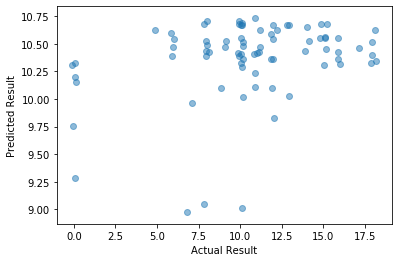

ridge
-------------------------------


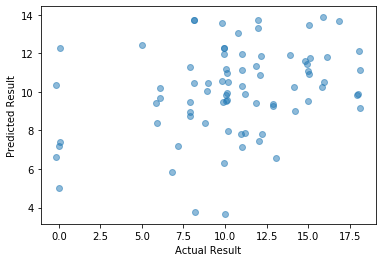

en
-------------------------------


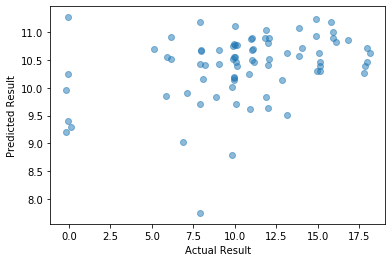

rf
-------------------------------


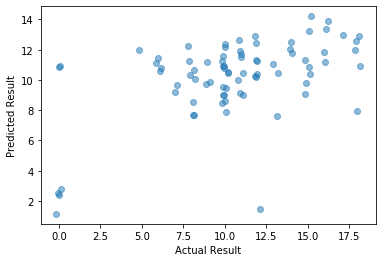

gb
-------------------------------


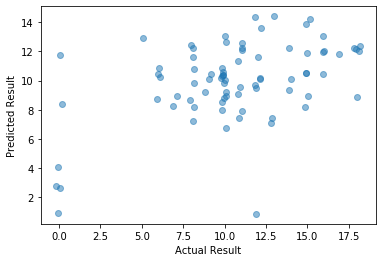

In [26]:
#let's visualize the performance for each models
for name, pred in prediction.items():
    print(name)
    print('-------------------------------')
    sns.regplot(data=df, x=y_test, y=pred, fit_reg=False, x_jitter=0.2, y_jitter=0.2, scatter_kws = {'alpha':1/2})
    plt.xlabel('Actual Result')
    plt.ylabel('Predicted Result')
    plt.show()

In [27]:
#helper function to plot feature importances
def plot_feature_importances(columns, feature_importances, show_top_n=10):
    feats = dict( zip(columns, feature_importances) )
    imp = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    imp.sort_values(by='Gini-importance').tail(show_top_n).plot(kind='barh', figsize=(8,8))
    plt.show()

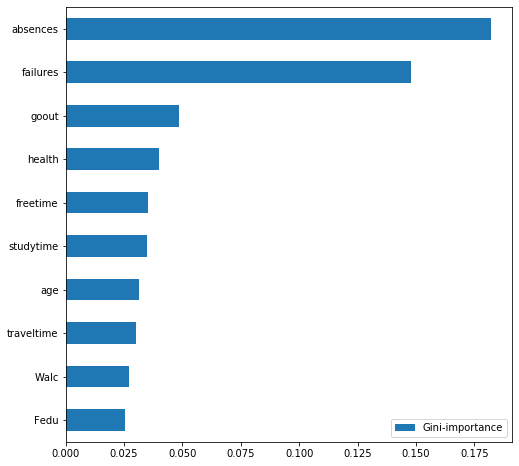

In [28]:
plot_feature_importances(X_train.columns, fitted_models['rf'].feature_importances_)

### Training using G1 & G2 results

In [29]:
#perform train and test data splits using y and X_g1_g2
X_train, X_test, y_train, y_test = train_test_split(X_g1_g2, y, test_size=0.2, random_state=1234)

# confirm we have the right number of train and test data set
print( len(X_train), len(X_test), len(y_train), len(y_test) )

316 79 316 79


In [30]:
#instantiate all the 5 models.
#we use all the default hyperparameters specified in the models.
rg_lasso = Lasso(random_state=1234)
rg_ridge = Ridge(random_state=1234)
rg_en = ElasticNet(random_state=1234) 
rg_rf = RandomForestRegressor(random_state=1234)
rg_gb = GradientBoostingRegressor(random_state=1234)

In [31]:
model_list = {'lasso': rg_lasso,
              'ridge': rg_ridge, 
              'en': rg_en, 
              'rf': rg_rf, 
              'gb': rg_gb}

In [32]:
fitted_models = {}
for name, model in model_list.items():
    model.fit(X_train, y_train)
    
    fitted_models[name] = model

In [33]:
prediction = {}
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    
    prediction[name] = pred

In [34]:
# Calculate and print R^2 and MAE
for name, pred in prediction.items():
    print(name)
    print('-------------------------------')
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print('\n')

lasso
-------------------------------
R^2: 0.8330387758590628
MAE: 1.0888888590228845


ridge
-------------------------------
R^2: 0.8204293061981341
MAE: 1.3330292913960324


en
-------------------------------
R^2: 0.8347229492872812
MAE: 1.136585704175734


rf
-------------------------------
R^2: 0.8886399466799966
MAE: 0.8881012658227849


gb
-------------------------------
R^2: 0.8735007603922297
MAE: 1.0130207000693252




lasso
-------------------------------


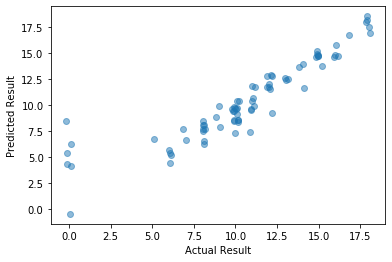

ridge
-------------------------------


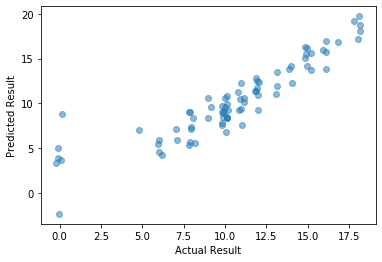

en
-------------------------------


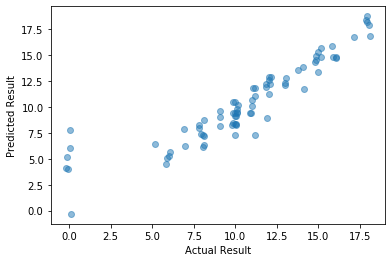

rf
-------------------------------


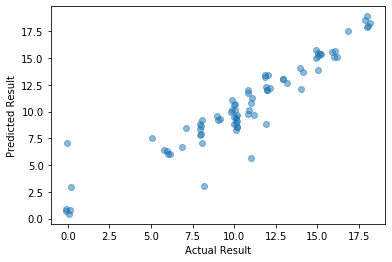

gb
-------------------------------


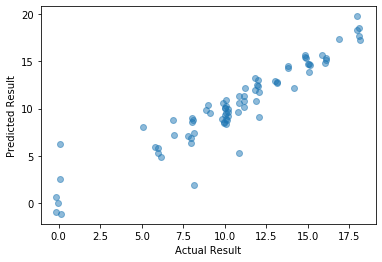

In [35]:
#let's visualize the performance for each models
for name, pred in prediction.items():
    print(name)
    print('-------------------------------')
    sns.regplot(data=df, x=y_test, y=pred, fit_reg=False, x_jitter=0.2, y_jitter=0.2, scatter_kws = {'alpha':1/2})
    plt.xlabel('Actual Result')
    plt.ylabel('Predicted Result')
    plt.show()

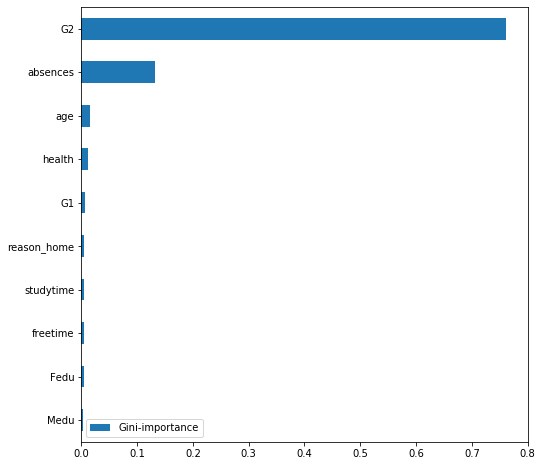

In [36]:
plot_feature_importances(X_train.columns, fitted_models['rf'].feature_importances_)

## Insights & Analysis 

Random Forest algorithm works well out-of-the-box without tuning on hyperparameters. It's also interesting to note that second period (G2) results has high influence on the final grade results (G3).Without G2 results, all the algorithm performs poorly.

G2 results, in combination of the 'absence' rate are the 2 most importance features to determine the final grade results.